### 1. Import bibliotek

In [618]:
import pandas as pd
import numpy as np
import matplotlib as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn.metrics as metrics

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix


from keras.models import Sequential 
from keras.layers import Dense


### 2. Przygotowanie danych do analizy

In [409]:
os.getcwd()

'C:\\Users\\skomo\\Documents\\pjatk\\padProj'

In [410]:
base_data = pd.read_csv("winequality-red.csv")
base_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [411]:
base_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [412]:
base_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [413]:
data = base_data.copy()

In [414]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [415]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Eksploracja danych

In [416]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

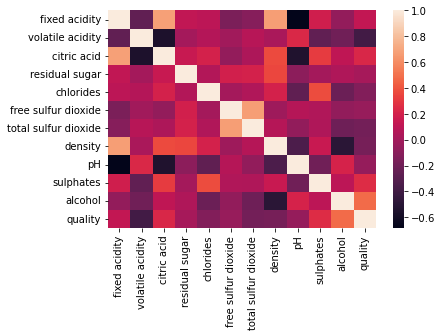

In [417]:
sns.heatmap(data.corr())


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

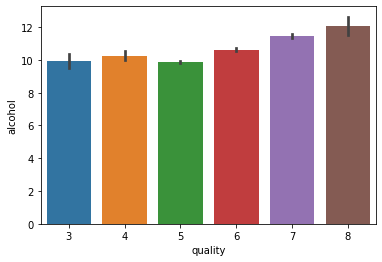

In [418]:
sns.barplot(x = 'quality', y = 'alcohol', data = data)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

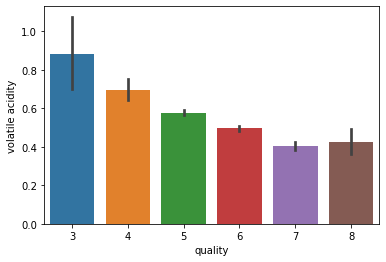

In [419]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

im mniejsza kwaśność zapachu tym lepsza ocena

### 4. Trenowanie modelu

In [679]:
y = data.iloc[:,11] 
x = data.iloc[:,0:11]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [680]:
x.head(5) # input

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [681]:
y.head(5)

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [682]:
def dtmodel(X_train, y_train):

    dt = DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    print("Decision Tree: {0}".format(dt.score(X_train,y_train)))
   
    return dt

dt = dtmodel(X_train,y_train)

Decision Tree: 1.0


In [683]:
y_predict = dt.predict(X_test)
print("Decision Tree accuracy {0}".format(accuracy_score(y_test, y_predict)))

Decision Tree accuracy 0.59


In [684]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.29      0.12      0.17        16
           5       0.65      0.67      0.66       171
           6       0.58      0.57      0.58       167
           7       0.49      0.55      0.52        42
           8       0.20      0.33      0.25         3

    accuracy                           0.59       400
   macro avg       0.37      0.37      0.36       400
weighted avg       0.59      0.59      0.59       400



### mała celność modelu. Zmniejszam więc liczbę zmiennych decyzyjnych do czterech

In [634]:
from collections import Counter
Counter(data['quality']) # na podstawie tego wiem jak mniej więcej podzielić zmienne targetu

Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})

In [635]:
rates = []
for i in data['quality']:
    if i >= 1 and i <= 4:
        rates.append('0')
    elif i == 5 :
        rates.append('1')
    elif i == 6 :
        rates.append('2')
    elif i >= 7 and i <= 10:
        rates.append('3')
        
data['Rates'] = rates

In [636]:
data['Rates'] = data['Rates'].astype(int)

In [637]:
Counter(data['Rates'])

Counter({1: 681, 2: 638, 3: 217, 0: 63})

In [685]:
data.head(5) # po dodaniu Rates do zmiennej z danymi 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Rates
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [639]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Rates
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,1.631019
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.763818
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,1.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,2.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,2.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,3.000000


In [640]:
y2 = data.iloc[:,12] 
x2 = data.iloc[:,0:11]
X_train2, X_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.3)

In [641]:
y2.head()

0    1
1    1
2    1
3    2
4    1
Name: Rates, dtype: int32

In [642]:
x2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Decision Tree

In [643]:
def dtmodel(X_train, y_train):

    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train,y_train)
    print("Decision Tree: {0}".format(dt.score(X_train,y_train)))
   
    return dt

dt = dtmodel(X_train2,y_train2)

Decision Tree: 1.0


In [644]:
y3_predict = dt.predict(X_test2)
print("Decision Tree {0}".format(accuracy_score(y_test2, y3_predict)))

Decision Tree 0.6479166666666667


celność znacznie się poprawiła

In [645]:
print("Ocena modelu 1. Decision Tree")
print(classification_report(y_test2,y3_predict))

Ocena modelu 1. Decision Tree
              precision    recall  f1-score   support

           0       0.38      0.22      0.28        23
           1       0.69      0.71      0.70       199
           2       0.67      0.64      0.65       199
           3       0.52      0.63      0.57        59

    accuracy                           0.65       480
   macro avg       0.57      0.55      0.55       480
weighted avg       0.65      0.65      0.64       480



In [646]:
confusion_matrix(y_test2, y3_predict)

array([[  5,  14,   4,   0],
       [  4, 142,  43,  10],
       [  3,  45, 127,  24],
       [  1,   6,  15,  37]], dtype=int64)

### Linear Regression

In [647]:
def lrmodel(X_train, y_train):

    lr = LinearRegression()
    lr.fit(X_train,y_train)
    print("Linear Regression score: {0}".format(lr.score(X_train,y_train)))
   
    return lr

In [648]:
lr = lrmodel(X_train2,y_train2)

Linear Regression score: 0.3687538102107306


In [649]:
y3_predictLR = lr.predict(X_test2)
print("Linear Regression r2 {0}".format(metrics.r2_score(y_test2, y3_predictLR)))
print("Linear Regression mean squared error {0}".format(metrics.mean_squared_error(y_test2, y3_predictLR)))
print("Linear Regression mean absolute error {0}".format(metrics.mean_absolute_error(y_test2, y3_predictLR)))
print("Linear Regression root mean squared error {0}".format(np.sqrt(metrics.mean_squared_error(y_test2, y3_predictLR))))

Linear Regression r2 0.33565188543622093
Linear Regression mean squared error 0.38466447862528813
Linear Regression mean absolute error 0.48661698262022396
Linear Regression root mean squared error 0.620213252539228


In [650]:
df = pd.DataFrame({'Actual': y_test2, 'Predicted': y3_predictLR})
df

,Actual,Predicted
794,2,2.471445
139,1,1.062493
1369,0,1.406050
155,1,1.576293
1333,1,1.086171
...,...,...
144,2,2.887349
1327,2,1.700223
552,2,1.777035
282,1,1.198200


### Random forest

In [651]:
def rfmodel(X_train, y_train):

    lr = RandomForestClassifier(criterion = 'entropy')
    lr.fit(X_train,y_train)
    print("Random forest: {0}".format(lr.score(X_train,y_train)))
   
    return lr

In [652]:
rf = rfmodel(X_train2,y_train2)

Random forest: 1.0


In [653]:
y3_predictRF = rf.predict(X_test2)
print("Random forest {0}".format(accuracy_score(y_test2, y3_predictRF)))

Random forest 0.725


In [654]:
print("Ocena modelu 3. Random forest")
print(classification_report(y_test2,y3_predictRF,zero_division=0))

Ocena modelu 3. Random forest
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        23
           1       0.74      0.81      0.77       199
           2       0.72      0.75      0.73       199
           3       0.70      0.63      0.66        59

    accuracy                           0.73       480
   macro avg       0.79      0.56      0.56       480
weighted avg       0.74      0.72      0.71       480



### SVC

In [655]:
from sklearn.svm import SVC

In [656]:
def svcmodel(X_train, y_train):

    svc = SVC()
    svc.fit(X_train,y_train)
    print("svc: {0}".format(lr.score(X_train,y_train)))
   
    return svc

In [657]:
svc = svcmodel(X_train2,y_train2)

svc: 0.3687538102107306


In [658]:
y_predictsvc = svc.predict(X_test2)
print("svc {0}".format(accuracy_score(y_test2, y_predictsvc)))

svc 0.5270833333333333


In [659]:
print(classification_report(y_test2,y_predictsvc,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.64      0.49      0.56       199
           2       0.47      0.78      0.59       199
           3       0.00      0.00      0.00        59

    accuracy                           0.53       480
   macro avg       0.28      0.32      0.29       480
weighted avg       0.46      0.53      0.48       480



#### przygotowanie danych do sieci neuronowej


In [660]:
data.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Rates'],
      dtype='object')

In [661]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'Rates']
data2 = data[cols].copy()

In [662]:
data2.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Rates
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [663]:
data2['Rates'] = data2['Rates'].astype(int)

In [664]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  Rates                 1599 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 143.8 KB


In [665]:
y3 = data2.iloc[:,11] 
x3 = data2.iloc[:,0:11]
X_train3, X_test3, y_train3, y_test3 = train_test_split(x3, y3, train_size=0.7, test_size=0.3)

In [666]:
y3.head()

0    1
1    1
2    1
3    2
4    1
Name: Rates, dtype: int32

In [667]:
x3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB


#### sieć

In [699]:
model = Sequential()

model.add(Dense(11, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_73 (Dense)             (None, 4)                 48        
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


In [704]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])


model.fit(X_train3, y_train3, batch_size = 128, epochs = 500)

Epoch 1/500
9/9 [==============================] - 0s 1ms/step - loss: 0.9021 - accuracy: 0.5925
Epoch 2/500
9/9 [==============================] - 0s 1ms/step - loss: 0.9048 - accuracy: 0.5979
Epoch 3/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8993 - accuracy: 0.5961
Epoch 4/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8972 - accuracy: 0.6014
Epoch 5/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8959 - accuracy: 0.6041
Epoch 6/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8950 - accuracy: 0.5987
Epoch 7/500
9/9 [==============================] - 0s 2ms/step - loss: 0.8956 - accuracy: 0.5996
Epoch 8/500
9/9 [==============================] - 0s 2ms/step - loss: 0.8942 - accuracy: 0.6014
Epoch 9/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8955 - accuracy: 0.6059
Epoch 10/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8924 - accuracy: 0.6005
Epoch 11/500
9/9 [===========

9/9 [==============================] - 0s 1ms/step - loss: 0.8721 - accuracy: 0.6193
Epoch 85/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8727 - accuracy: 0.6184
Epoch 86/500
9/9 [==============================] - 0s 997us/step - loss: 0.8716 - accuracy: 0.6086
Epoch 87/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8703 - accuracy: 0.6104
Epoch 88/500
9/9 [==============================] - 0s 998us/step - loss: 0.8698 - accuracy: 0.6139
Epoch 89/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8700 - accuracy: 0.6148
Epoch 90/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8704 - accuracy: 0.6077
Epoch 91/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8734 - accuracy: 0.6068
Epoch 92/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8754 - accuracy: 0.6077
Epoch 93/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8713 - accuracy: 0.6175
Epoch 94/500
9/9 [===========

9/9 [==============================] - 0s 998us/step - loss: 0.8599 - accuracy: 0.6122
Epoch 167/500
9/9 [==============================] - 0s 997us/step - loss: 0.8589 - accuracy: 0.6256
Epoch 168/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8594 - accuracy: 0.6166
Epoch 169/500
9/9 [==============================] - 0s 997us/step - loss: 0.8595 - accuracy: 0.6184
Epoch 170/500
9/9 [==============================] - 0s 997us/step - loss: 0.8595 - accuracy: 0.6148
Epoch 171/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8615 - accuracy: 0.6211
Epoch 172/500
9/9 [==============================] - 0s 997us/step - loss: 0.8576 - accuracy: 0.6220
Epoch 173/500
9/9 [==============================] - ETA: 0s - loss: 0.8191 - accuracy: 0.67 - 0s 999us/step - loss: 0.8576 - accuracy: 0.6166
Epoch 174/500
9/9 [==============================] - 0s 997us/step - loss: 0.8574 - accuracy: 0.6273
Epoch 175/500
9/9 [==============================] - 0s 1ms/step - 

9/9 [==============================] - 0s 886us/step - loss: 0.8533 - accuracy: 0.6139
Epoch 248/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8522 - accuracy: 0.6148
Epoch 249/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8519 - accuracy: 0.6202
Epoch 250/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8510 - accuracy: 0.6238
Epoch 251/500
9/9 [==============================] - 0s 996us/step - loss: 0.8504 - accuracy: 0.6184
Epoch 252/500
9/9 [==============================] - 0s 997us/step - loss: 0.8496 - accuracy: 0.6265
Epoch 253/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8537 - accuracy: 0.6095
Epoch 254/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8549 - accuracy: 0.6059
Epoch 255/500
9/9 [==============================] - 0s 997us/step - loss: 0.8543 - accuracy: 0.6166
Epoch 256/500
9/9 [==============================] - 0s 997us/step - loss: 0.8550 - accuracy: 0.6202
Epoch 257/500


9/9 [==============================] - 0s 1ms/step - loss: 0.8479 - accuracy: 0.6184
Epoch 330/500
9/9 [==============================] - 0s 997us/step - loss: 0.8467 - accuracy: 0.6166
Epoch 331/500
9/9 [==============================] - 0s 950us/step - loss: 0.8496 - accuracy: 0.6166
Epoch 332/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8488 - accuracy: 0.6122
Epoch 333/500
9/9 [==============================] - 0s 997us/step - loss: 0.8474 - accuracy: 0.6220
Epoch 334/500
9/9 [==============================] - 0s 887us/step - loss: 0.8510 - accuracy: 0.6291
Epoch 335/500
9/9 [==============================] - 0s 997us/step - loss: 0.8486 - accuracy: 0.6193
Epoch 336/500
9/9 [==============================] - 0s 996us/step - loss: 0.8509 - accuracy: 0.6077
Epoch 337/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8562 - accuracy: 0.6166
Epoch 338/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8509 - accuracy: 0.6130
Epoch 339/50

9/9 [==============================] - 0s 1ms/step - loss: 0.8434 - accuracy: 0.6193
Epoch 412/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8453 - accuracy: 0.6157
Epoch 413/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8434 - accuracy: 0.6148
Epoch 414/500
9/9 [==============================] - 0s 996us/step - loss: 0.8464 - accuracy: 0.6175
Epoch 415/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8436 - accuracy: 0.6229
Epoch 416/500
9/9 [==============================] - 0s 998us/step - loss: 0.8468 - accuracy: 0.6238
Epoch 417/500
9/9 [==============================] - 0s 999us/step - loss: 0.8439 - accuracy: 0.6166
Epoch 418/500
9/9 [==============================] - 0s 887us/step - loss: 0.8443 - accuracy: 0.6166
Epoch 419/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8451 - accuracy: 0.6193
Epoch 420/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8428 - accuracy: 0.6193
Epoch 421/500
9/

9/9 [==============================] - 0s 1ms/step - loss: 0.8424 - accuracy: 0.6113
Epoch 493/500
9/9 [==============================] - 0s 887us/step - loss: 0.8418 - accuracy: 0.6211
Epoch 494/500
9/9 [==============================] - 0s 997us/step - loss: 0.8420 - accuracy: 0.6130
Epoch 495/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8424 - accuracy: 0.6273
Epoch 496/500
9/9 [==============================] - 0s 775us/step - loss: 0.8474 - accuracy: 0.6122
Epoch 497/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8458 - accuracy: 0.6175
Epoch 498/500
9/9 [==============================] - 0s 997us/step - loss: 0.8445 - accuracy: 0.6265
Epoch 499/500
9/9 [==============================] - 0s 1ms/step - loss: 0.8426 - accuracy: 0.6104
Epoch 500/500
9/9 [==============================] - 0s 888us/step - loss: 0.8447 - accuracy: 0.6256


In [701]:
score, acc = model.evaluate(X_test3, y_test3,
                            batch_size=128)
print('Test score:', score)
print('Test accuracy:', acc)


4/4 [==============================] - 0s 1ms/step - loss: 0.9120 - accuracy: 0.5854
Test score: 0.9119846224784851
Test accuracy: 0.5854166746139526


## 6. Testy

In [703]:
my_data =[
            [ #z pierwszego wiersza - wynik powinien być  = 1
            7.4,
            0.700,
            0.00,
            1.9,
            0.076,
            11.0,
            34.0,
            0.9978,
            3.51,
            0.56,
            9.4
    ]
]

model.predict(my_data)

array([[0.06306633, 0.6545661 , 0.27359962, 0.00876806]], dtype=float32)